2.4613053334294265e-06 -5.251488187200137e-07


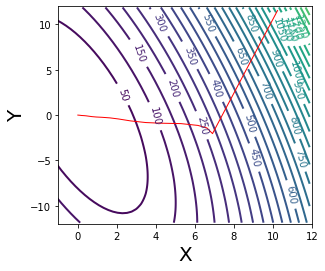

In [3]:
# -*- coding: utf-8 -*-
#共轭梯度优化
import numpy as np
import pylab as pl

F=np.zeros([100,100])
for i in np.arange(0,100): #函数
    for j in np.arange(0,100):
        x0 = i*0.2-10
        y0 = j*0.2-10
        F[i][j] = x0**2+10*y0**2+4*x0*y0
x=10.234  #初始位置
y=11.537  #初始位置
dx_old = 0
dy_old = 0
dfdx_old = 0
dfdy_old = 0
deltar=0.05  #初始步长
fold = x**2+10*y**2+4*x*y #函数值
xx=[]
yy=[]
xx.append(x)
yy.append(y)
for i in np.arange(0,2000):
    dfdx = -2*x-4*y  #梯度
    dfdy = -20*y-4*x #梯度
    if i > 0:        
        beta = (dfdx**2+dfdy**2)/(dfdx_old**2+dfdy_old**2)
    else:
        beta = 0

    dx = dfdx + beta*dx_old   #当前搜索方向
    dy = dfdy + beta*dy_old

    dx_old = dx
    dy_old = dy
  
    dfdx_old = dfdx
    dfdy_old = dfdy
    
    deltax = deltar * dx #搜索步长 x
    deltay = deltar * dy #搜索步长 y   
    x = x + deltax  #更新x
    y = y + deltay  #更新y
    
    xx.append(x)
    yy.append(y)
    if abs(deltax)<1.0e-6 and abs(deltay)<1.0e-6:
       print (x,y)
       break
   
extent = [-12, 12, -12, 12]
fig = pl.figure(figsize=(10,4))
# contour line
ax1 =fig.add_subplot(1,2,1)
levels = np.arange(0.0,2000.0,50.0)
cs = ax1.contour(F,levels,origin='lower',linewidths=2,extent=extent)
ax1.clabel(cs)
ax1.plot(xx, yy, 'r-',linewidth=1.0)
ax1.set_ylabel(r'Y', fontsize=20)
ax1.set_xlabel(r'X', fontsize=20)
ax1.set_xlim(-1,12)
ax1.set_ylim(-12,12)
pl.show()